In [3]:
from utils import Scalar, draw_graph

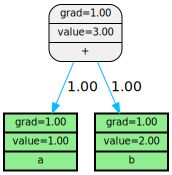

In [7]:
# autograd
a = Scalar(1.0, label="a")
b = Scalar(2.0, label="b")
c = a + b
c.backward()
draw_graph(c, "backward")

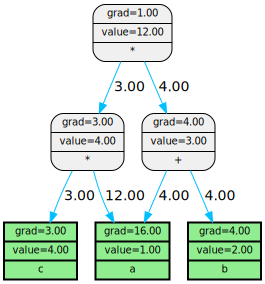

In [8]:
a = Scalar(1.0, label='a')
b = Scalar(2.0, label='b')
c = Scalar(4.0, label='c')
d = a + b
e = a * c
f = d * e
backward_process = f.backward(draw_graph)
draw_graph(f, 'backward')

In [11]:
from utils import Scalar, draw_graph
from linear_model import Linear, mse
import numpy as np

In [12]:
# gradient descent
x = np.arange(0, 10, 0.1)
x = (x-x.mean())/x.std()
eps = np.random.randn(len(x))/10
y = 2*x + 3 + eps
# batch_size 为一次参数更新用到的样本数量
# 借助 GPU 并行计算优势，加快训练速度，但需要较大显存
batch_size = 20
# 设置梯度累计次数
# 实际每次使用小批次 micro_size 个样本构建计算图，并行计算梯度
# 通过小批次模拟更大的 batch_size
# 相当于用 batch_size = 20 的效果进行训练，但每次只占用 micro_size = 5 的显存
gradient_accumulation_iter = 4
micro_size = int(batch_size/gradient_accumulation_iter)
lr = 0.1
model = Linear()

for t in range(30*gradient_accumulation_iter):
    # 前向传播
    ix = (t*micro_size) % len(x)
    xx = x[ix:ix+micro_size]
    yy = y[ix:ix+micro_size]
    loss = mse([model.error(x_input, y_gt) for x_input, y_gt in zip(xx, yy)])
    loss *= 1/gradient_accumulation_iter
    # 反向传播
    loss.backward()
    # 更新参数
    if (t+1) % gradient_accumulation_iter == 0:
        for param in model.parameters():
            param.value -= lr*param.grad
            # 梯度清空
            param.grad = .0
        print(f'Step {t+1}, Result: {model.string()}')

Step 4, Result: y=-0.05x+0.05
Step 8, Result: y=-0.24x+0.35
Step 12, Result: y=-0.22x+0.89
Step 16, Result: y=0.30x+1.62
Step 20, Result: y=1.34x+2.36
Step 24, Result: y=1.42x+2.31
Step 28, Result: y=1.39x+2.36
Step 32, Result: y=1.39x+2.50
Step 36, Result: y=1.52x+2.68
Step 40, Result: y=1.79x+2.87
Step 44, Result: y=1.84x+2.84
Step 48, Result: y=1.83x+2.84
Step 52, Result: y=1.84x+2.88
Step 56, Result: y=1.87x+2.93
Step 60, Result: y=1.93x+2.97
Step 64, Result: y=1.95x+2.96
Step 68, Result: y=1.95x+2.96
Step 72, Result: y=1.95x+2.97
Step 76, Result: y=1.96x+2.98
Step 80, Result: y=1.97x+2.99
Step 84, Result: y=1.98x+2.99
Step 88, Result: y=1.98x+2.98
Step 92, Result: y=1.98x+3.00
Step 96, Result: y=1.99x+3.00
Step 100, Result: y=1.99x+3.00
Step 104, Result: y=1.99x+2.99
Step 108, Result: y=1.99x+2.99
Step 112, Result: y=1.99x+3.00
Step 116, Result: y=1.99x+3.00
Step 120, Result: y=1.99x+3.00


In [ ]:
# dropout
